In [1]:
import torch
from Utils import visualize_batch
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 12)

In [2]:
model = torch.load('checkpoints/128final/long_run_beta4_5blocks_9000.pt')
setattr(model.decoder, 'first_fmap_size', 128//8)  # a small fix that is required after changing the model

model.requires_grad = False
model = model.eval()

latent_size = 128

# Random Sampling

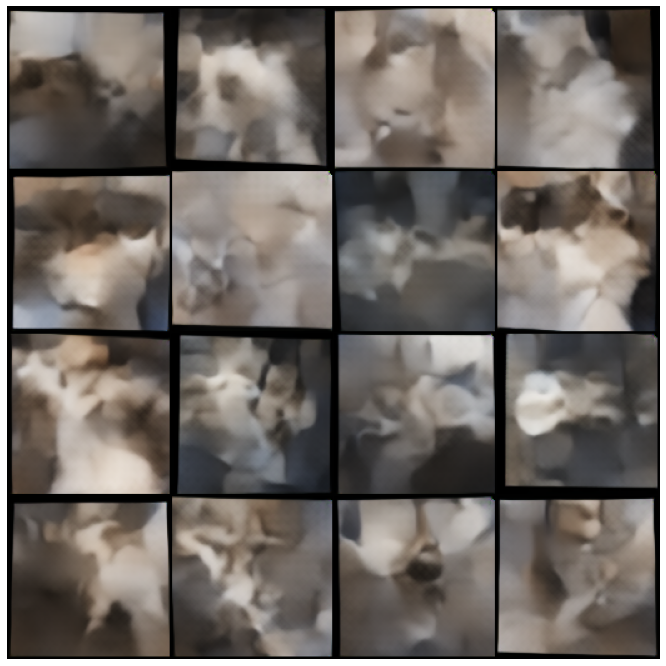

In [18]:
samples = model.sample(16)
visualize_batch(samples)

## lower variance sampling:

std: 0.01


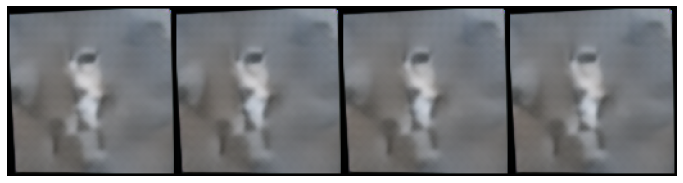

std: 0.05


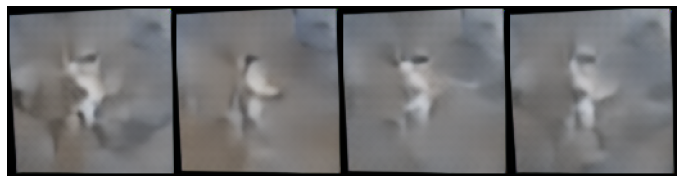

std: 0.1


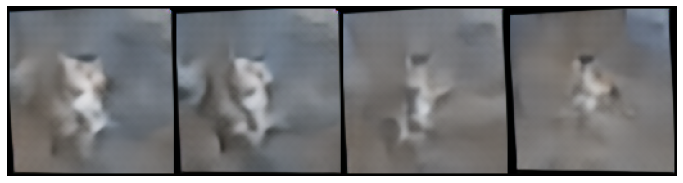

std: 0.3


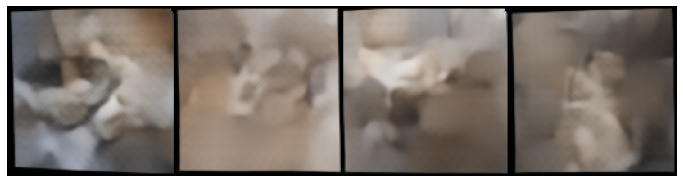

std: 0.5


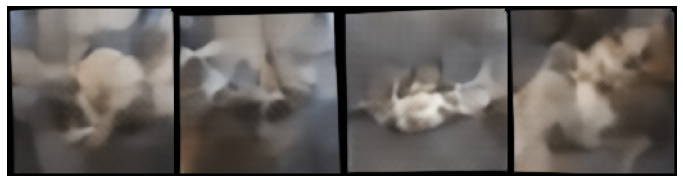

std: 5


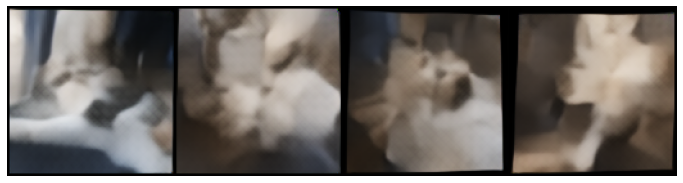

std: 20


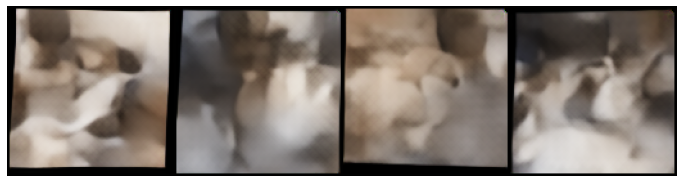

In [28]:
for std in [0.01, 0.05, 0.1, 0.3, 0.5, 5, 20]:
    print("std:", std)
    z = torch.normal(0 * torch.ones(4,latent_size), std*torch.ones(4,latent_size)).to('cuda')
    samples = model.decoder(z)
    visualize_batch(samples)

# Systematic sampling
## vector of the same constant

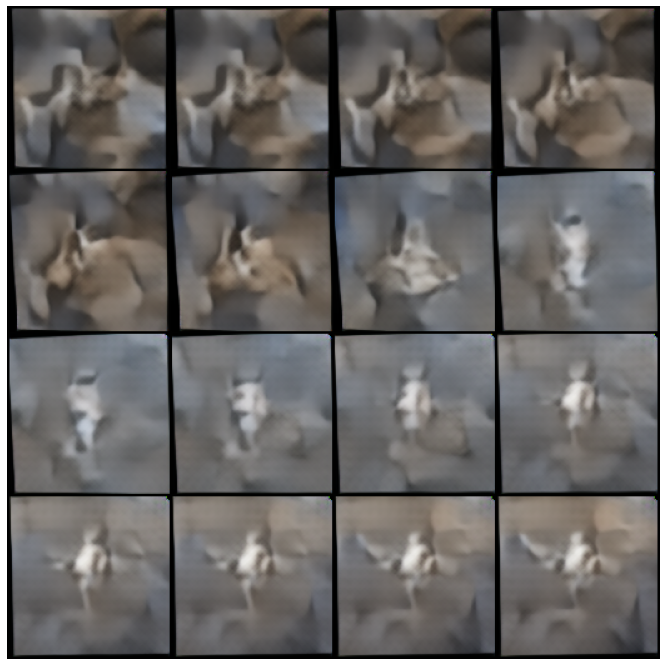

In [20]:
# z = torch.normal(0 * torch.ones(2,400), 1*torch.ones(2,400)).to('cuda')
z = [(c * torch.ones(1, 128)).to('cuda') for c in torch.linspace(-0.5, 0.5, 16).view(16, 1, 1)]
z = torch.stack(z)
samples = model.decoder(z)
visualize_batch(samples)

## vector of the same constant tiled negatively and positively
[1, -1, 1, -1 ...]

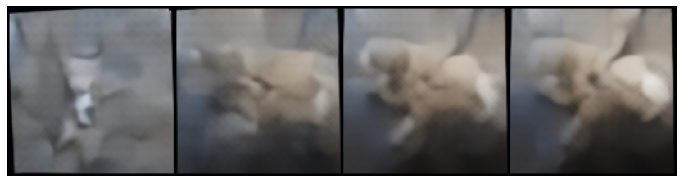

In [37]:
z = [torch.tensor([c, -c]*(latent_size//2)).to('cuda') for c in[0.1, 0.5, 1, 3]]
z = torch.stack(z)
samples = model.decoder(z)
visualize_batch(samples)

## changing one element

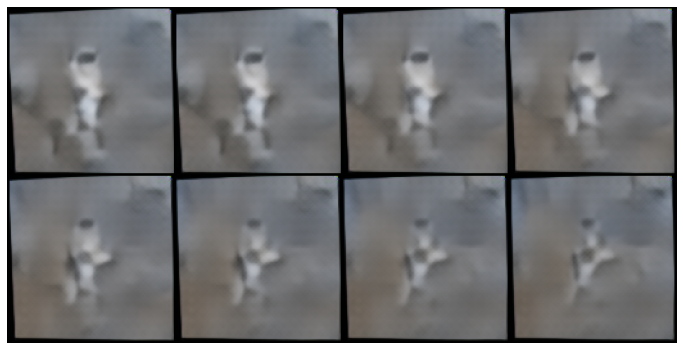

In [8]:
z = torch.zeros(latent_size).to('cuda')
z_list = [z]
for i in range(7):
    z_list.append(z.clone())
    z_list[-1][0] += i*10
samples = model.decoder(torch.stack(z_list))
visualize_batch(samples)

## Changing Four Elements

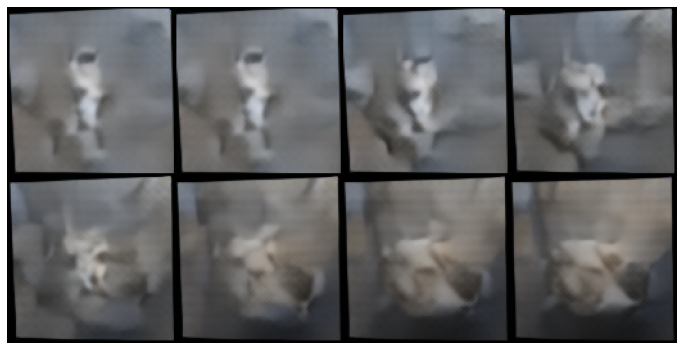

In [12]:
z = torch.zeros(latent_size).to('cuda')
z_list = [z]
for i in range(7):
    z_list.append(z.clone())
    z_list[-1][0:4] += i*0.2
samples = model.decoder(torch.stack(z_list))
visualize_batch(samples)

# Interpolating between two images

# Sampling from $P(z|x)$ for all images